<a href="https://colab.research.google.com/github/gedabusa/Machine_Learning_Course/blob/master/Module_1/data_preprocessing_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In this first step, we import all libraries used for loading dataset, ploting results and handling data. Pandas loads data from files as .csv, .json and databases. Numpy handles dataframes and Matplotlib creates plot with transfomed data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

Data.csv is a file with 4 columns that specifies the purchases in a site. In 3 first columns, we find independent variables, as country where client purchased from, age and salary from it. The last one is a flag whether or not the client purchased the product.

Using function __iloc__, we can slice the dataset, knowing the column order and the dependence between them. the result is two vectors. 

In [3]:
df = pd.read_csv("Data.csv")
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [4]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [5]:
print(Y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

If you let the data as they are saved in the dataset, if could gerate errors in your machine learning model. There are many approaches how to lead with null and missing data in your dataset. You can modify the value for some statistical measure, remove data from dataset or put in zero.

_Sklearn_ already uses functions to modify values into dataset. In this example, we are going to replace missing values for mean itself. In order to aplly on the datset, we must call transformation function. The implementation can be done separately, first calling fit function to calcule mean and then calling transformation function to do it inside dataset.

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

## Encoding categorical data

The simplest implementation to use string values is to transform them in numeric values. It can be realized converting classes in columns. for example, for country column, we find three diferents countries. we can change 
the first country by zero, the second one by one and the last one by two. the problem of using that concept is our model would assume the data like a order list instead of a classification.

The best approach is to create one column by each existent country and then we fill the columns up with binary value. For example, for France will have the vector [1 0 0], for Spain [0 1 0] and for Germany [0 0 1].

### Encoding the Independent Variable

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
# type of transformation
# kind of transformation

# Remainder... To keep the columns in the dataset
X = np.array(ct.fit_transform(X))

In [8]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [10]:
print(Y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

We are going to split our dataset into the training dataset and test dataset. we will be trained a dataset to estimate the best parameters and performance for a ML model. Its implementation estimates standard deviation between the output model and training output dataset. The test dataset will be used to know if our model is closed with our test output set.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [12]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [13]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [14]:
print(Y_train)

[0 1 0 0 1 1 0 1]


In [15]:
print(Y_test)

[0 1]


## Feature Scaling

scaling significa colocar todos los datos en el mismo orden, evitando que la gran diferencia existente entre ellos, perjudique el entrenamiento del modelo de ML.

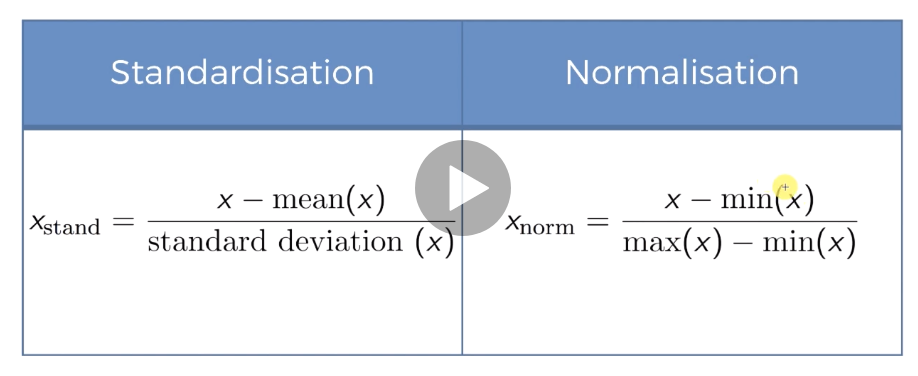
the first method is __standardisation__, where it is used mean and standard deviation. the second method is __normalisation__ where we use the min and max values and calcule every value inside a range. Normalization is recommended when you have a normal distribution. In the other hand, standartisation is recommended in a plenty of cases.

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [17]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [18]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
